In [56]:
#mining baby names

import pandas as pd
import matplotlib.pyplot as pp
import zipfile
import os

In [57]:
#read in the baby names zip file and extract
#extract to the local directory which is desigante by (.)

zipfile.ZipFile('names.zip').extractall('.')

In [58]:
#view the files

os.listdir('names')[:10]

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt']

In [59]:
#use Python commands to open a file

open('names/yob2011.txt', 'r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

In [60]:
#use Pandas commands to read the same file and assign the results to a variable

names_2011 = pd.read_csv('names/yob2011.txt')
names_2011.head(10)

,Sophia,F,21816
0,Isabella,F,19870
1,Emma,F,18777
2,Olivia,F,17294
3,Ava,F,15480
4,Emily,F,14236
5,Abigail,F,13229
6,Madison,F,12360
7,Mia,F,11512
8,Chloe,F,10970
9,Elizabeth,F,10062


In [61]:
#adjust the heading

names_2011 = pd.read_csv('names/yob2011.txt', names=['name', 'sex', 'number'])
names_2011.head(10)

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480
5,Emily,F,14236
6,Abigail,F,13229
7,Madison,F,12360
8,Mia,F,11512
9,Chloe,F,10970


In [62]:
names_2011.head()

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


In [63]:
names_2011.tail()

,name,sex,number
33864,Zylar,M,5
33865,Zylas,M,5
33866,Zyran,M,5
33867,Zyshawn,M,5
33868,Zytavion,M,5


In [64]:
#create a new list that contains all the names from all the years;
#add a year column

names_all = []

for year in range(1880, 2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year), names=['name', 'sex', 'number']))
    names_all[-1]['year'] = year

In [65]:
names_all

[           name sex  number  year
 0          Mary   F    7065  1880
 1          Anna   F    2604  1880
 2          Emma   F    2003  1880
 3     Elizabeth   F    1939  1880
 4        Minnie   F    1746  1880
 ...         ...  ..     ...   ...
 1995     Woodie   M       5  1880
 1996     Worthy   M       5  1880
 1997     Wright   M       5  1880
 1998       York   M       5  1880
 1999  Zachariah   M       5  1880
 
 [2000 rows x 4 columns],
            name sex  number  year
 0          Mary   F    6919  1881
 1          Anna   F    2698  1881
 2          Emma   F    2034  1881
 3     Elizabeth   F    1852  1881
 4      Margaret   F    1658  1881
 ...         ...  ..     ...   ...
 1930     Wiliam   M       5  1881
 1931     Wilton   M       5  1881
 1932       Wing   M       5  1881
 1933       Wood   M       5  1881
 1934     Wright   M       5  1881
 
 [1935 rows x 4 columns],
            name sex  number  year
 0          Mary   F    8148  1882
 1          Anna   F    3143  1882

In [66]:
#now place all the list elements (data frames) into a single data frame

all_years = pd.concat(names_all)
all_years.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [67]:
all_years.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


In [68]:
#create a new data frame that is indexed by sex, then by name, theny by year;
#let's sort the data also

all_years_indexed = all_years.set_index(['sex', 'name', 'year']).sort_index()

In [69]:
all_years_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
...                    ...
M   Zytavious 2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

In [70]:
#lookup Mary

all_years_indexed.loc['F', 'Mary'].head()

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217


In [71]:
all_years_indexed.loc['M', 'Joseph'].head()

,number
year,
1880,2632
1881,2456
1882,2670
1883,2515
1884,2708


In [72]:
all_years_indexed.loc['M', 'Sue'].head()

,number
year,
1917,7
1927,5
1928,5
1930,5
1931,6


In [73]:
#create a function to plot a name

def plot_name(sex, name):
    data = all_years_indexed.loc[sex, name]
    pp.plot(data.index, data.values)

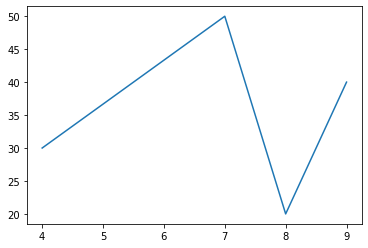

In [74]:
x = [4,7,8,9]
y = [30, 50, 20, 40]

pp.plot(x, y)
pp.show()

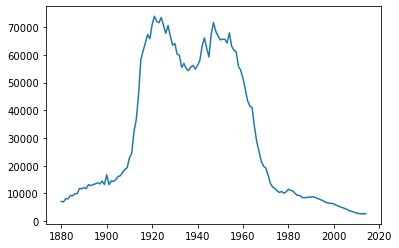

In [75]:
plot_name('F', 'Mary')
pp.show()

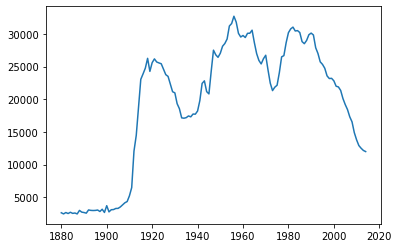

In [76]:
plot_name('M', 'Joseph')
pp.show()

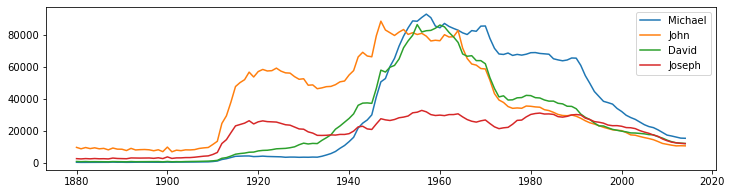

In [77]:
#loop through a collection of popular boy names and graph them

pp.figure(figsize=(12, 3))

names = ['Michael', 'John', 'David', 'Joseph']

for name in names:
    plot_name('M', name)
    
pp.legend(names)
pp.show()

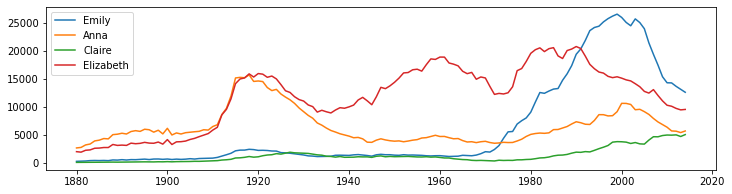

In [78]:
#loop through a collection of popular girl names and graph them

pp.figure(figsize=(12, 3))

names = ['Emily', 'Anna', 'Claire', 'Elizabeth']

for name in names:
    plot_name('F', name)
    
pp.legend(names)
pp.show()

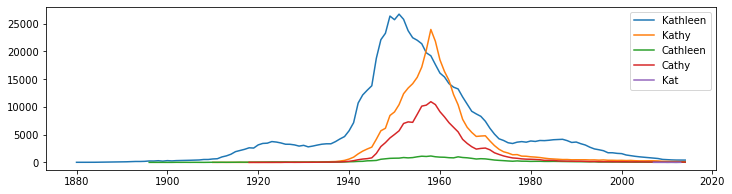

In [79]:
#loop through a collection of a girl name with different spelling/sound

pp.figure(figsize=(12, 3))

names = ['Kathleen', 'Kathy', 'Cathleen', 'Cathy', 'Kat']

for name in names:
    plot_name('F', name)
    
pp.legend(names)
pp.show()

In [80]:
names

['Kathleen', 'Kathy', 'Cathleen', 'Cathy', 'Kat']

In [81]:
all_years_indexed.loc['F'].loc[names]

number
name     year        
Kathleen 1880      21
         1881      13
         1882      23
         1883      21
         1884      27
...               ...
Cathy    2013      59
         2014      48
Kat      2007       9
         2009       5
         2013       7

[454 rows x 1 columns]

In [82]:
#unstack the data frame: unstacking means moving the innermost row index to become
#the innermost column index

all_years_indexed.loc['F'].loc[names].unstack(level=0).head()

number                         
name Kathleen Kathy Cathleen Cathy Kat
year                                  
1880     21.0   NaN      NaN   NaN NaN
1881     13.0   NaN      NaN   NaN NaN
1882     23.0   NaN      NaN   NaN NaN
1883     21.0   NaN      NaN   NaN NaN
1884     27.0   NaN      NaN   NaN NaN

In [83]:
#replace the NaNs with 0

all_years_indexed.loc['F'].loc[names].unstack(level=0).fillna(0).head()

number                          
name Kathleen Kathy Cathleen Cathy  Kat
year                                   
1880     21.0   0.0      0.0   0.0  0.0
1881     13.0   0.0      0.0   0.0  0.0
1882     23.0   0.0      0.0   0.0  0.0
1883     21.0   0.0      0.0   0.0  0.0
1884     27.0   0.0      0.0   0.0  0.0

In [84]:
#popular boy names for 2008

pop_2008 = all_years_indexed.loc['M',:,2008].sort_values(by='number', ascending=False)

In [85]:
pop_2008.head()

,number
name,
Jacob,22568
Michael,20590
Ethan,20196
Joshua,19186
Daniel,18985


In [86]:
#reset the default index

pop_2008.reset_index().head(10)

,name,number
0,Jacob,22568
1,Michael,20590
2,Ethan,20196
3,Joshua,19186
4,Daniel,18985
5,Alexander,18679
6,William,18380
7,Anthony,18378
8,Christopher,17928
9,Matthew,17573


In [87]:
#drop the unnecessary columns

pop_2008.reset_index().drop(['number'], axis=1).head(10)

,name
0,Jacob
1,Michael
2,Ethan
3,Joshua
4,Daniel
5,Alexander
6,William
7,Anthony
8,Christopher
9,Matthew


In [88]:
#create a function to return the top names for any year based on gender

def top_names(sex, year, total=10):
    top_list = all_years_indexed.loc[sex,:,year].sort_values(by='number', ascending=False)
    top_list = top_list.reset_index()
    top_list = top_list.drop(['number'], axis=1).head(total)
    top_list.columns = [year]
    top_list.index += 1
    
    return top_list

In [89]:
top_names('M', 2008, 5)

,2008
1,Jacob
2,Michael
3,Ethan
4,Joshua
5,Daniel


In [90]:
top_names('M', 1970)

,1970
1,Michael
2,David
3,James
4,John
5,Robert
6,Christopher
7,William
8,Brian
9,Mark
10,Richard


In [91]:
top_names('F', 1970)

,1970
1,Jennifer
2,Lisa
3,Kimberly
4,Michelle
5,Amy
6,Angela
7,Melissa
8,Tammy
9,Mary
10,Tracy


In [92]:
years = [top_names('M', year) for year in range(2010, 2014)]

In [93]:
years

[         2010
 1       Jacob
 2       Ethan
 3     Michael
 4      Jayden
 5     William
 6   Alexander
 7        Noah
 8      Daniel
 9       Aiden
 10    Anthony,
          2011
 1       Jacob
 2       Mason
 3     William
 4      Jayden
 5        Noah
 6     Michael
 7       Ethan
 8   Alexander
 9       Aiden
 10     Daniel,
          2012
 1       Jacob
 2       Mason
 3       Ethan
 4        Noah
 5     William
 6        Liam
 7     Michael
 8      Jayden
 9   Alexander
 10      Aiden,
          2013
 1        Noah
 2        Liam
 3       Jacob
 4       Mason
 5     William
 6       Ethan
 7     Michael
 8   Alexander
 9      Jayden
 10     Daniel]

In [94]:
years[0]

,2010
1,Jacob
2,Ethan
3,Michael
4,Jayden
5,William
6,Alexander
7,Noah
8,Daniel
9,Aiden
10,Anthony


In [95]:
years[0].join(years[1:])

,2010,2011,2012,2013
1,Jacob,Jacob,Jacob,Noah
2,Ethan,Mason,Mason,Liam
3,Michael,William,Ethan,Jacob
4,Jayden,Jayden,Noah,Mason
5,William,Noah,William,William
6,Alexander,Michael,Liam,Ethan
7,Noah,Ethan,Michael,Michael
8,Daniel,Alexander,Jayden,Alexander
9,Aiden,Aiden,Alexander,Jayden
10,Anthony,Daniel,Aiden,Daniel


In [96]:
#create a function that returns the top names over a range of years

def top_names_range(sex, year_start, year_end):
    years = [top_names(sex, year) for year in range(year_start, year_end+1)]
    
    return years[0].join(years[1:])

In [97]:
top_names_range('F', 1960, 1967)

,1960,1961,1962,1963,1964,1965,1966,1967
1,Mary,Mary,Lisa,Lisa,Lisa,Lisa,Lisa,Lisa
2,Susan,Lisa,Mary,Mary,Mary,Mary,Kimberly,Kimberly
3,Linda,Susan,Susan,Susan,Susan,Karen,Mary,Michelle
4,Karen,Linda,Karen,Karen,Karen,Kimberly,Michelle,Mary
5,Donna,Karen,Linda,Linda,Patricia,Susan,Karen,Susan
6,Lisa,Patricia,Patricia,Donna,Kimberly,Patricia,Susan,Karen
7,Patricia,Donna,Donna,Patricia,Donna,Donna,Patricia,Angela
8,Debra,Cynthia,Cynthia,Lori,Linda,Linda,Tammy,Tammy
9,Cynthia,Sandra,Deborah,Sandra,Cynthia,Cynthia,Angela,Melissa
10,Deborah,Deborah,Sandra,Cynthia,Tammy,Angela,Jennifer,Jennifer


In [98]:
top_names_range('F', 1960, 1967).stack()

1   1960        Mary
    1961        Mary
    1962        Lisa
    1963        Lisa
    1964        Lisa
              ...   
10  1963     Cynthia
    1964       Tammy
    1965      Angela
    1966    Jennifer
    1967    Jennifer
Length: 80, dtype: object

In [99]:
#count the number of names for each name in the top years

top_names_range('F', 1960, 1967).stack().value_counts()

Mary        8
Susan       8
Karen       8
Lisa        8
Patricia    7
Linda       6
Donna       6
Cynthia     6
Kimberly    4
Tammy       3
Deborah     3
Sandra      3
Angela      3
Michelle    2
Jennifer    2
Lori        1
Debra       1
Melissa     1
dtype: int64

In [107]:
#get the popular names for our latest data frame

popular_girls = top_names_range('F', 1960, 1967).stack().value_counts().index[:4]

In [108]:
popular_girls

Index(['Mary', 'Susan', 'Karen', 'Lisa'], dtype='object')

In [109]:
popular_boys = top_names_range('M', 1960, 1967).stack().value_counts().index[:4]

In [110]:
popular_boys

Index(['David', 'Michael', 'John', 'James'], dtype='object')

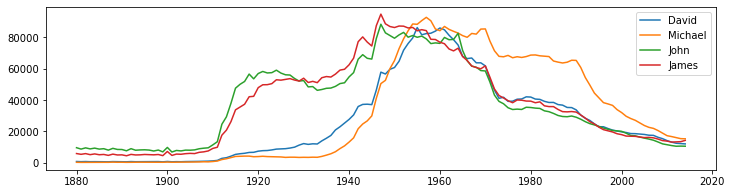

In [111]:
#plot the popular boy names

pp.figure(figsize=(12,3))

for name in popular_boys:
    plot_name('M', name)
    
pp.legend(popular_boys)
pp.show()

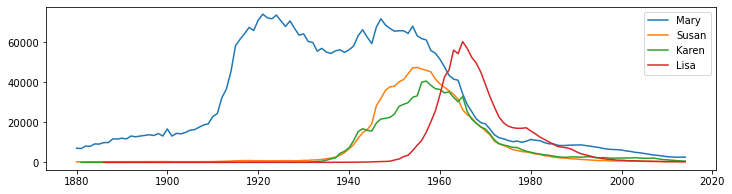

In [112]:
#plot the popular girl names

pp.figure(figsize=(12,3))

for name in popular_girls:
    plot_name('F', name)
    
pp.legend(popular_girls)
pp.show()